In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import dython
from dython.nominal import associations
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('london_merged.csv', parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [5]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


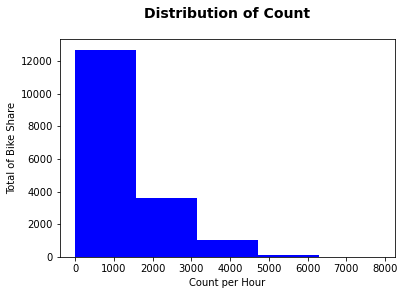

In [6]:
plt.hist(df["cnt"], bins = 5, color = "Blue")
plt.title("Distribution of Count", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.07)
plt.ylabel("Total of Bike Share")
plt.xlabel("Count per Hour")
plt.show()

### Data Preparation

In [7]:
timedt = df['timestamp'].dt
df['year'] = timedt.year
df['month'] = timedt.month_name()
df['day'] = timedt.day_name()
df['hour'] = timedt.hour
df['date'] = timedt.date

In [8]:
df['season_name'] = df['season'].map({0: "spring", 1:"summer", 2:"fall", 3:"winter"})
df['weather'] = df['weather_code'].map({1:"Clear", 2:"few clouds", 3:"Broken clouds", 4:"Cloudy", 
                                             7:"light Rain shower", 10:"rain with thunderstorm", 26:"snowfall", 94:"Freezing Fog"})

In [9]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,date,season_name,weather
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,January,Sunday,0,2015-01-04,winter,Broken clouds
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,January,Sunday,1,2015-01-04,winter,Clear
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,2,2015-01-04,winter,Clear
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,3,2015-01-04,winter,Clear
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,January,Sunday,4,2015-01-04,winter,Clear


In [10]:
df = df.drop(columns = ['timestamp'])

In [11]:
correlation = df.corr()
correlation['cnt'].sort_values(ascending = False)[1:]

t1              0.388798
t2              0.369035
hour            0.324423
wind_speed      0.116295
year            0.010046
is_holiday     -0.051698
is_weekend     -0.096499
season         -0.116180
weather_code   -0.166633
hum            -0.462901
Name: cnt, dtype: float64

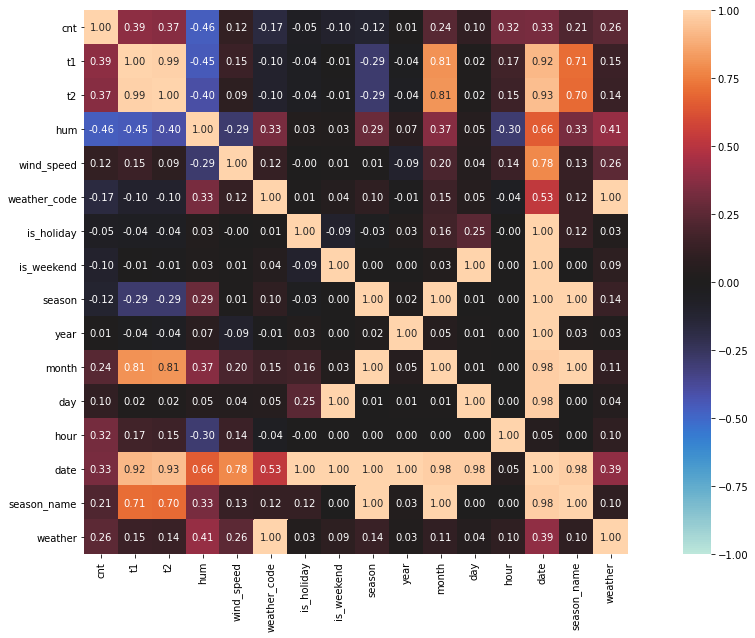

In [12]:
associations(df,figsize=(20,10))
plt.show()

In [13]:
### Changing several columns to categorical
df['is_holiday'] = df['is_holiday'].astype('object')
df['is_weekend'] = df['is_weekend'].astype('object')
df['season'] = df['season'].astype('object')
df['weather_code'] = df['weather_code'].astype('object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  object 
 6   is_holiday    17414 non-null  object 
 7   is_weekend    17414 non-null  object 
 8   season        17414 non-null  object 
 9   year          17414 non-null  int64  
 10  month         17414 non-null  object 
 11  day           17414 non-null  object 
 12  hour          17414 non-null  int64  
 13  date          17414 non-null  object 
 14  season_name   17414 non-null  object 
 15  weather       17414 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 2.1+ MB


### Importing Machine Learning Package

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import skew
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

### Splitting data

In [16]:
X = df.drop(columns = ['cnt','season','weather_code','date'])
y = df['cnt']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

In [18]:
cat_columns = ['is_holiday','is_weekend','month','weather','day','season_name']

num_columns = ['t1','t2','hum','wind_speed','year','hour']

### Pipeline

In [19]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_KNN = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor())
])

In [20]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor())
])

In [21]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_XGB = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor())
])


In [22]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_DT = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeRegressor())
])

### Base Model

### KNN

In [23]:
KNNpipe = pipe_KNN.fit(X_train, y_train)

In [24]:
KNN_pipe_train = KNNpipe.predict(X_train)
KNN_pipe_test = KNNpipe.predict(X_test)

In [25]:
#KNN Train
knn_R2_train = r2_score(y_train, KNN_pipe_train)
knn_MAE_train = mean_absolute_error(y_train, KNN_pipe_train)
knn_MSE_train = mean_squared_error(y_train, KNN_pipe_train)
knn_RMSE_train = np.sqrt(knn_MSE_train)
#KNN Test
knn_R2_test = r2_score(y_test, KNN_pipe_test)
knn_MAE_test = mean_absolute_error(y_test, KNN_pipe_test)
knn_MSE_test = mean_squared_error(y_test, KNN_pipe_test)
knn_RMSE_test = np.sqrt(knn_MSE_test)

In [26]:
data = {
    "R2 Score" : [knn_R2_train,knn_R2_test],
    "MAE" : [knn_MAE_train,knn_MAE_test],
    "MSE" : [knn_MSE_train,knn_MSE_test],
    "RMSE" : [knn_RMSE_train,knn_RMSE_test]}
df_scoreknn =  pd.DataFrame(data = data, index = ['KNN Train', 'KNN Test'])
df_scoreknn

,R2 Score,MAE,MSE,RMSE
KNN Train,0.649221,410.818951,411175.255640,641.229488
KNN Test,0.401834,547.283434,716748.117428,846.609779


#### Random Forest

In [27]:
RF_pipe = pipe_RF.fit(X_train,y_train)

In [28]:
RF_pipe_train = RF_pipe.predict(X_train)
RF_pipe_test = RF_pipe.predict(X_test)

In [29]:
#RF Train
RF_R2_train = r2_score(y_train, RF_pipe_train)
RF_MAE_train = mean_absolute_error(y_train, RF_pipe_train)
RF_MSE_train = mean_squared_error(y_train, RF_pipe_train)
RF_RMSE_train = np.sqrt(RF_MSE_train)
#RF Test
RF_R2_test = r2_score(y_test, RF_pipe_test)
RF_MAE_test = mean_absolute_error(y_test, RF_pipe_test)
RF_MSE_test = mean_squared_error(y_test, RF_pipe_test)
RF_RMSE_test = np.sqrt(RF_MSE_test)

In [30]:
data = {
    "R2 Score" : [RF_R2_train,RF_R2_test],
    "MAE" : [RF_MAE_train,RF_MAE_test],
    "MSE" : [RF_MSE_train,RF_MSE_test],
    "RMSE" : [RF_RMSE_train,RF_RMSE_test]}
df_rf =  pd.DataFrame(data = data, index = ['RF Train', 'RF Test'])
df_rf

,R2 Score,MAE,MSE,RMSE
RF Train,0.993471,46.271450,7653.573492,87.484704
RF Test,0.957552,121.394899,50863.505555,225.529390


#### Decision Tree

In [31]:
DT_pipe = pipe_DT.fit(X_train, y_train)

In [32]:
DT_pipe_train = DT_pipe.predict(X_train)
DT_pipe_test = DT_pipe.predict(X_test)

In [33]:
#DT Train
DT_R2_train = r2_score(y_train, DT_pipe_train)
DT_MAE_train = mean_absolute_error(y_train, DT_pipe_train)
DT_MSE_train = mean_squared_error(y_train, DT_pipe_train)
DT_RMSE_train = np.sqrt(DT_MSE_train)
#DT Test
DT_R2_test = r2_score(y_test, DT_pipe_test)
DT_MAE_test = mean_absolute_error(y_test, DT_pipe_test)
DT_MSE_test = mean_squared_error(y_test, DT_pipe_test)
DT_RMSE_test = np.sqrt(DT_MSE_test)

In [34]:
data = {
    "R2 Score" : [DT_R2_train,DT_R2_test],
    "MAE" : [DT_MAE_train,DT_MAE_test],
    "MSE" : [DT_MSE_train,DT_MSE_test],
    "RMSE" : [DT_RMSE_train,DT_RMSE_test]}
df_dt =  pd.DataFrame(data = data, index = ['DT Train', 'DT Test'])
df_dt

,R2 Score,MAE,MSE,RMSE
DT Train,0.999995,0.036896,5.674036,2.382024
DT Test,0.918874,166.919035,97208.841516,311.783325


#### XGB

In [35]:
XGB_pipe = pipe_XGB.fit(X_train, y_train)

In [36]:
XGB_pipe_train = XGB_pipe.predict(X_train)
XGB_pipe_test = XGB_pipe.predict(X_test)

In [37]:
#XGB Train
XGB_R2_train = r2_score(y_train, XGB_pipe_train)
XGB_MAE_train = mean_absolute_error(y_train, XGB_pipe_train)
XGB_MSE_train = mean_squared_error(y_train, XGB_pipe_train)
XGB_RMSE_train = np.sqrt(XGB_MSE_train)
#XGB Test
XGB_R2_test = r2_score(y_test, XGB_pipe_test)
XGB_MAE_test = mean_absolute_error(y_test, XGB_pipe_test)
XGB_MSE_test = mean_squared_error(y_test, XGB_pipe_test)
XGB_RMSE_test = np.sqrt(XGB_MSE_test)

In [38]:
data = {
    "R2 Score" : [XGB_R2_train,XGB_R2_test],
    "MAE" : [XGB_MAE_train,XGB_MAE_test],
    "MSE" : [XGB_MSE_train,XGB_MSE_test],
    "RMSE" : [XGB_RMSE_train,XGB_RMSE_test]}
df_xgb =  pd.DataFrame(data = data, index = ['XGB Train', 'XGB Test'])
df_xgb

,R2 Score,MAE,MSE,RMSE
XGB Train,0.983057,88.112059,19860.256571,140.926423
XGB Test,0.957970,126.539374,50362.216697,224.415277


### Base Models Summary
- Looking all from the score Decision Tree , Random Forest and XGboost have the best R2 Score

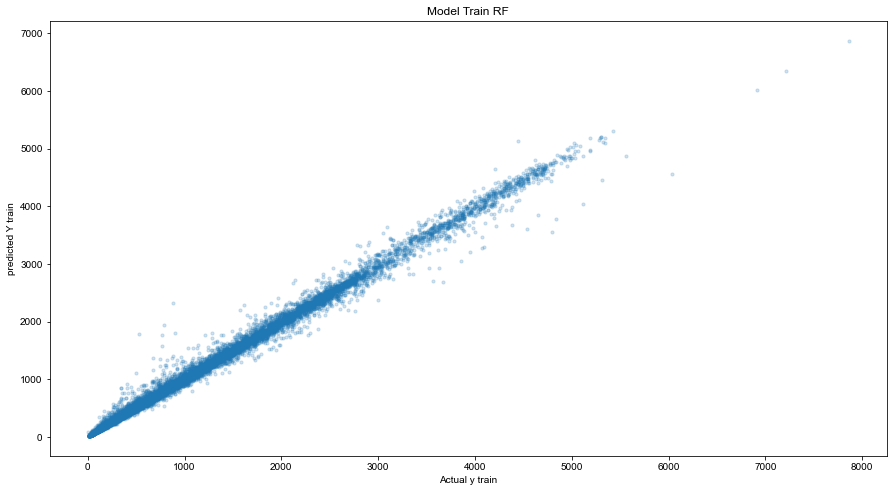

In [39]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,RF_pipe_train,s=10, alpha=0.2)
plt.title('Model Train RF')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

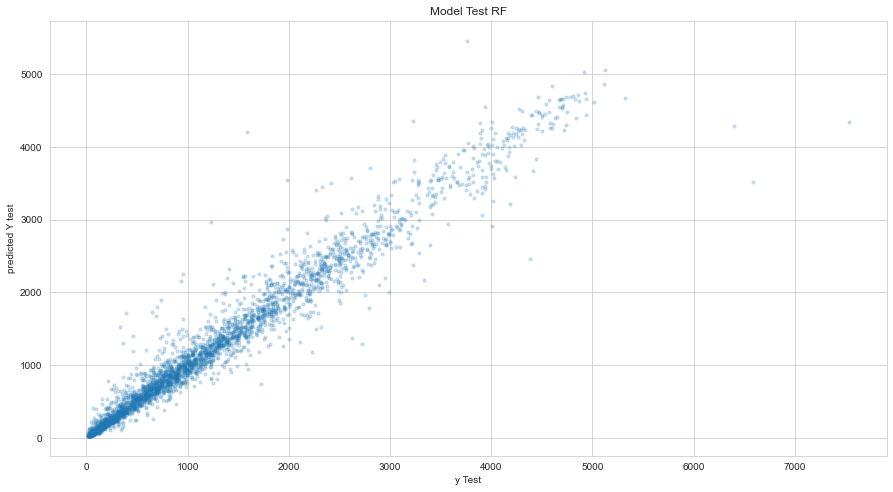

In [40]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,RF_pipe_test,s=10, alpha=0.2)
plt.title('Model Test RF')
plt.xlabel('y Test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

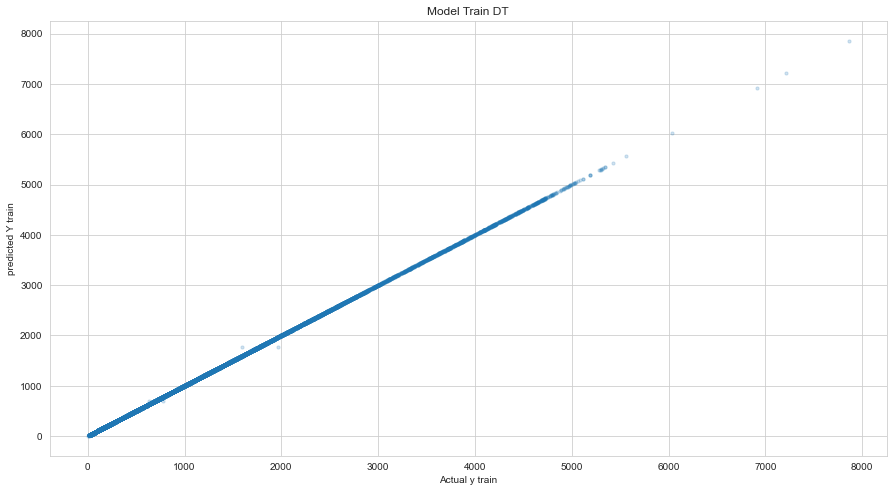

In [41]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,DT_pipe_train,s=10, alpha=0.2)
plt.title('Model Train DT')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

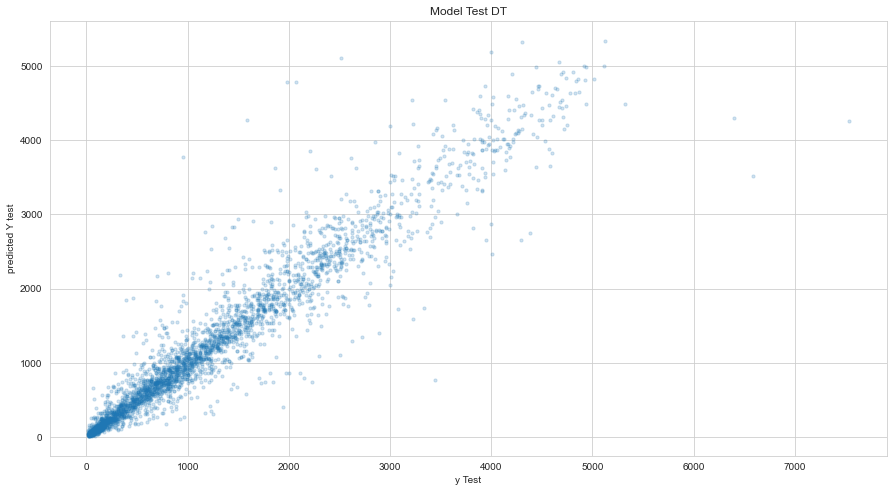

In [42]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,DT_pipe_test,s=10, alpha=0.2)
plt.title('Model Test DT')
plt.xlabel('y Test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

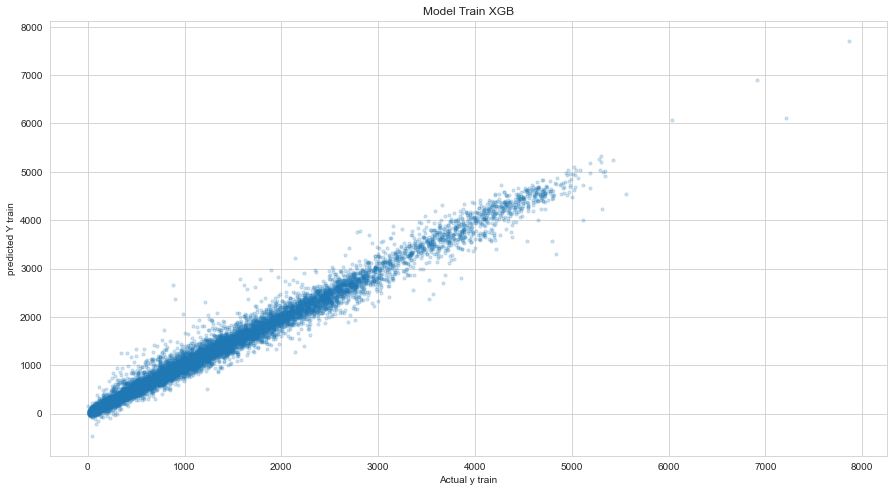

In [43]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,XGB_pipe_train,s=10, alpha=0.2)
plt.title('Model Train XGB')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

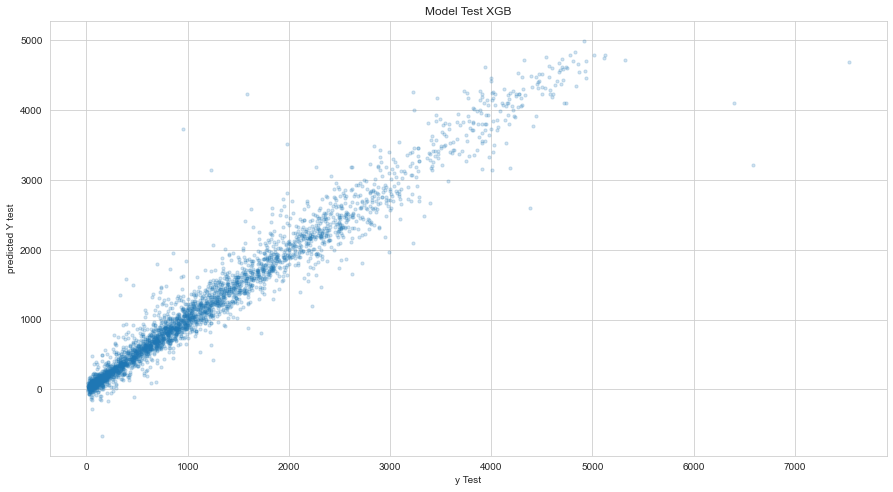

In [44]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,XGB_pipe_test,s=10, alpha=0.2)
plt.title('Model Test XGB')
plt.xlabel('y Test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

### Hyperparameter Tuning

In [45]:
pipe_RF.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['t1', 't2', 'hum', 'wind_speed', 'year',
                                     'hour']),
                                   ('categoric',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['is_holiday', 'is_weekend', 'month',
                                     'weather', 'day', 'season_name'])])),
  ('algo', RandomForestRegressor())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['t1', 't2', 'hum', 'wind_speed', 'year',
                                   'hour']),
                                 ('cate

In [46]:
param_RF = {'algo__max_depth': [None,1,3,5],
           'algo__min_samples_leaf': [1,7,10],
           'algo__n_estimators':[100,200,400],
           'algo__max_features':['auto','sqrt']}

In [47]:
model_RF = GridSearchCV(estimator= pipe_RF, param_grid=param_RF, n_jobs=-1, cv=3, verbose=1)

In [48]:
model_RF.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.4min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['t1',
                                                                          't2',
                                                                          'hum',
                                                                          'wind_speed',
                                                                          'year',
                                                                          'hour']),
                                                                        ('categoric',
                                                         

In [49]:
RF_tuned = model_RF.best_estimator_

In [50]:
model_RF.best_params_

{'algo__max_depth': None,
 'algo__max_features': 'auto',
 'algo__min_samples_leaf': 1,
 'algo__n_estimators': 200}

In [51]:
RF_pipe_train_tuned = RF_tuned.predict(X_train)
RF_pipe_test_tuned = RF_tuned.predict(X_test)

In [52]:
#RF tuned Train
RF_R2_train_tuned = r2_score(y_train, RF_pipe_train_tuned)
RF_MAE_train_tuned = mean_absolute_error(y_train, RF_pipe_train_tuned)
RF_MSE_train_tuned = mean_squared_error(y_train, RF_pipe_train)
RF_RMSE_train_tuned = np.sqrt(RF_MSE_train_tuned)
#RF tuned Test
RF_R2_test_tuned = r2_score(y_test, RF_pipe_test_tuned)
RF_MAE_test_tuned = mean_absolute_error(y_test, RF_pipe_test_tuned)
RF_MSE_test_tuned = mean_squared_error(y_test, RF_pipe_test_tuned)
RF_RMSE_test_tuned = np.sqrt(RF_MSE_test_tuned)

In [53]:
data = {
    "R2 Score" : [RF_R2_train_tuned,RF_R2_test_tuned],
    "MAE" : [RF_MAE_train_tuned,RF_MAE_test_tuned],
    "MSE" : [RF_MSE_train_tuned,RF_MSE_test_tuned],
    "RMSE" : [RF_RMSE_train_tuned,RF_RMSE_test_tuned]}
df_rf_tuned =  pd.DataFrame(data = data, index = ['RF Train Tuned', 'RF Test Tuned'])
df_rf_tuned

,R2 Score,MAE,MSE,RMSE
RF Train Tuned,0.993712,45.773109,7653.573492,87.484704
RF Test Tuned,0.957725,120.664141,50655.381080,225.067503


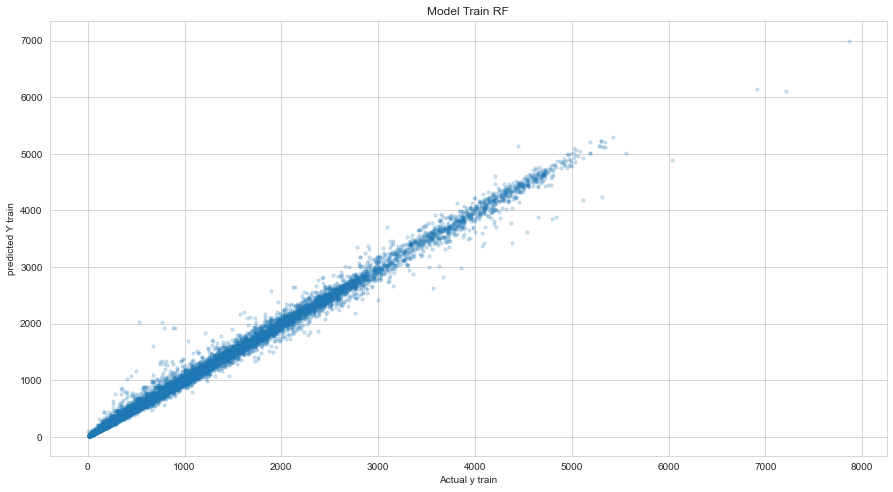

In [54]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,RF_pipe_train_tuned,s=10, alpha=0.2)
plt.title('Model Train RF')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

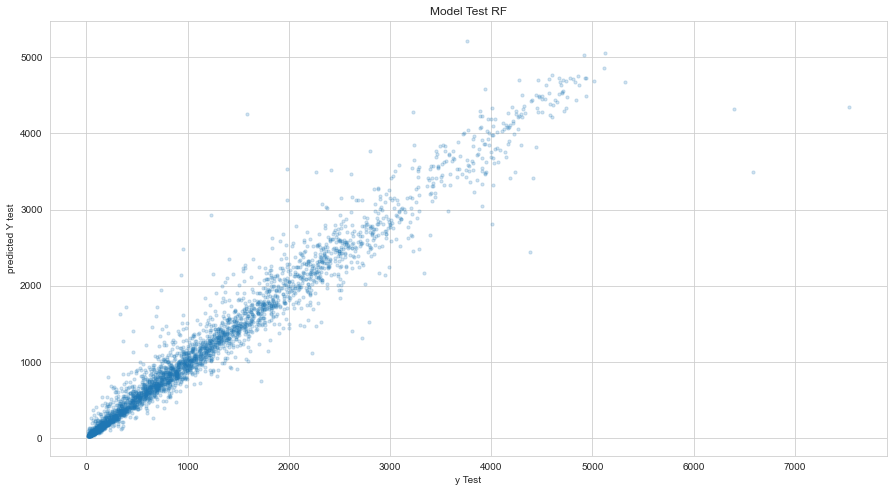

In [55]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,RF_pipe_test_tuned,s=10, alpha=0.2)
plt.title('Model Test RF')
plt.xlabel('y Test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

In [56]:
### Decision tree

In [57]:
pipe_DT.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['t1', 't2', 'hum', 'wind_speed', 'year',
                                     'hour']),
                                   ('categoric',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['is_holiday', 'is_weekend', 'month',
                                     'weather', 'day', 'season_name'])])),
  ('algo', DecisionTreeRegressor())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['t1', 't2', 'hum', 'wind_speed', 'year',
                                   'hour']),
                                 ('cate

In [58]:
param_DT = {'algo__max_depth':[None,1,3, 5],
            'algo__min_samples_split':[2, 5, 10],
            'algo__min_samples_leaf':[1, 2, 5],
            'algo__max_features':['auto','sqrt']}

In [59]:
model_DT = GridSearchCV(estimator = pipe_DT, param_grid = param_DT, n_jobs=-1, cv=3, verbose=1)

In [60]:
model_DT.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   10.0s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['t1',
                                                                          't2',
                                                                          'hum',
                                                                          'wind_speed',
                                                                          'year',
                                                                          'hour']),
                                                                        ('categoric',
                                                         

In [61]:
model_DT.best_params_

{'algo__max_depth': None,
 'algo__max_features': 'auto',
 'algo__min_samples_leaf': 5,
 'algo__min_samples_split': 5}

In [62]:
DT_tuned = model_DT.best_estimator_

In [63]:
DT_pipe_train_tuned = DT_tuned.predict(X_train)
DT_pipe_test_tuned = DT_tuned.predict(X_test)

In [93]:
#RF tuned Train
DT_R2_train_tuned = r2_score(y_train, DT_pipe_train_tuned)
DT_MAE_train_tuned = mean_absolute_error(y_train, DT_pipe_train_tuned)
DT_MSE_train_tuned = mean_squared_error(y_train, DT_pipe_train_tuned)
DT_RMSE_train_tuned = np.sqrt(DT_MSE_train_tuned)
#RF tuned Test
DT_R2_test_tuned = r2_score(y_test, DT_pipe_test_tuned)
DT_MAE_test_tuned = mean_absolute_error(y_test, DT_pipe_test_tuned)
DT_MSE_test_tuned = mean_squared_error(y_test, DT_pipe_test_tuned)
DT_RMSE_test_tuned = np.sqrt(DT_MSE_test_tuned)

In [65]:
data = {
    "R2 Score" : [DT_R2_train_tuned,DT_R2_test_tuned],
    "MAE" : [DT_MAE_train_tuned,DT_MAE_test_tuned],
    "MSE" : [DT_MSE_train_tuned,DT_MSE_test_tuned],
    "RMSE" : [DT_RMSE_train_tuned,DT_RMSE_test_tuned]}
df_dt_tuned =  pd.DataFrame(data = data, index = ['DT Train Tuned', 'DT Test Tuned'])
df_dt_tuned

,R2 Score,MAE,MSE,RMSE
DT Train Tuned,0.972037,98.516200,32777.696339,181.046117
DT Test Tuned,0.935473,154.469423,77319.341336,278.063556


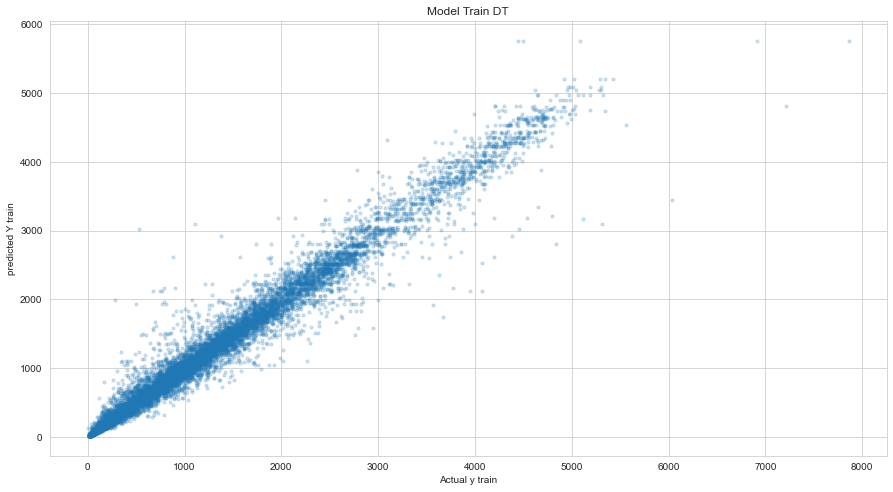

In [66]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,DT_pipe_train_tuned,s=10, alpha=0.2)
plt.title('Model Train DT')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

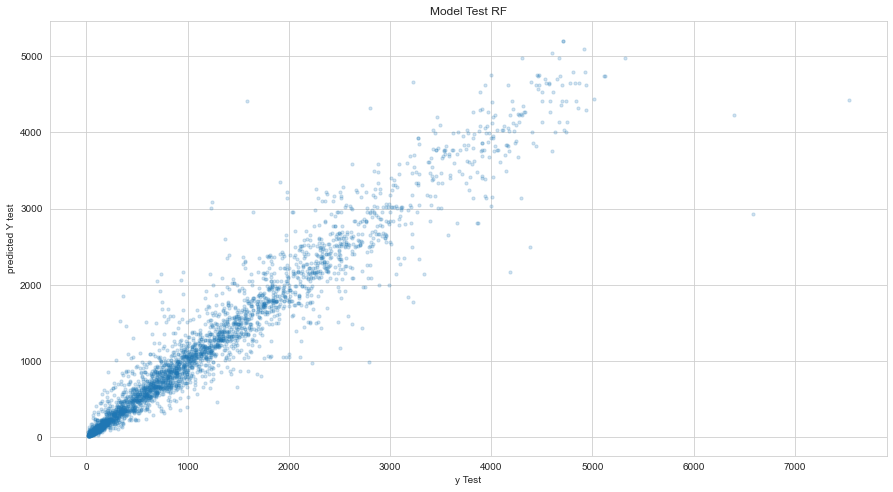

In [67]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,DT_pipe_test_tuned,s=10, alpha=0.2)
plt.title('Model Test RF')
plt.xlabel('y Test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

In [68]:
### XGBOOST

In [69]:
pipe_XGB.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['t1', 't2', 'hum', 'wind_speed', 'year',
                                     'hour']),
                                   ('categoric',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['is_holiday', 'is_weekend', 'month',
                                     'weather', 'day', 'season_name'])])),
  ('algo',
   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, mon

In [84]:
param_XGB = {'algo__max_depth':[5,6,7,9],
             'algo__learning_rate':[0.1,0.2,0.5,1],
             'algo__n_estimators':[100,200,300,400],
             'algo__gamma':[0,3,5]}

In [87]:
model_XGB = GridSearchCV(estimator= pipe_XGB, param_grid=param_XGB, n_jobs=-1, cv=3, verbose=1)

In [88]:
model_XGB.fit(X_train,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 31.8min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['t1',
                                                                          't2',
                                                                          'hum',
                                                                          'wind_speed',
                                                                          'year',
                                                                          'hour']),
                                                                        ('categoric',
                                                         

In [89]:
model_XGB.best_params_

{'algo__gamma': 5,
 'algo__learning_rate': 0.1,
 'algo__max_depth': 9,
 'algo__n_estimators': 400}

In [90]:
XGB_tuned = model_XGB.best_estimator_

In [91]:
XGB_pipe_train_tuned = XGB_tuned.predict(X_train)
XGB_pipe_test_tuned = XGB_tuned.predict(X_test)

In [94]:
#RF tuned Train
XGB_R2_train_tuned = r2_score(y_train, XGB_pipe_train_tuned)
XGB_MAE_train_tuned = mean_absolute_error(y_train, XGB_pipe_train_tuned)
XGB_MSE_train_tuned = mean_squared_error(y_train, XGB_pipe_train_tuned)
XGB_RMSE_train_tuned = np.sqrt(XGB_MSE_train_tuned)
#RF tuned Test
XGB_R2_test_tuned = r2_score(y_test, XGB_pipe_test_tuned)
XGB_MAE_test_tuned = mean_absolute_error(y_test, XGB_pipe_test_tuned)
XGB_MSE_test_tuned = mean_squared_error(y_test, XGB_pipe_test_tuned)
XGB_RMSE_test_tuned = np.sqrt(XGB_MSE_test_tuned)

In [95]:
data = {
    "R2 Score" : [XGB_R2_train_tuned,XGB_R2_test_tuned],
    "MAE" : [XGB_MAE_train_tuned,DT_MAE_test_tuned],
    "MSE" : [XGB_MSE_train_tuned,XGB_MSE_test_tuned],
    "RMSE" : [XGB_RMSE_train_tuned,XGB_RMSE_test_tuned]}
df_XGB_tuned =  pd.DataFrame(data = data, index = ['XGB Train Tuned', 'XGB Test Tuned'])
df_XGB_tuned

,R2 Score,MAE,MSE,RMSE
XGB Train Tuned,0.999015,21.282214,1154.369412,33.976012
XGB Test Tuned,0.965209,154.469423,41688.424576,204.177434


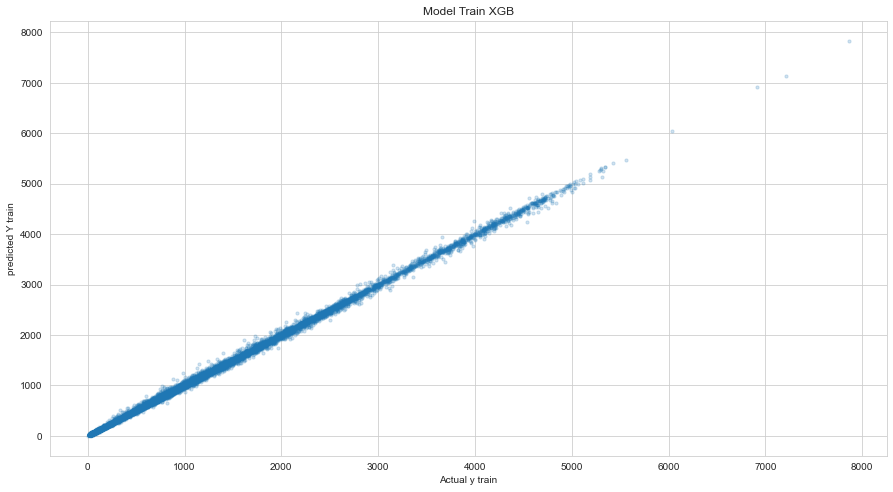

In [96]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,XGB_pipe_train_tuned,s=10, alpha=0.2)
plt.title('Model Train XGB')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

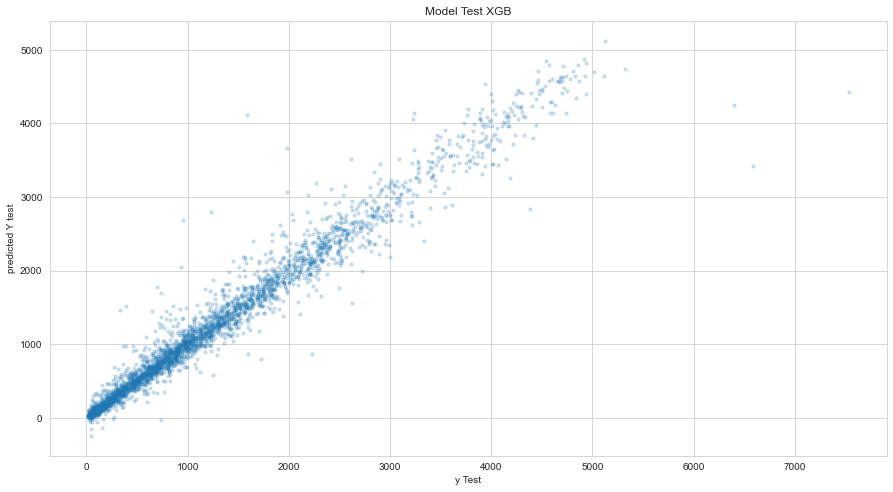

In [97]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,XGB_pipe_test_tuned,s=10, alpha=0.2)
plt.title('Model Test XGB')
plt.xlabel('y Test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')